In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
data=pd.read_csv("Creditcard_data.csv")

In [3]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,575,-0.572263,0.731748,1.541254,0.150506,1.108974,0.372152,1.084879,-0.146329,-0.274447,...,-0.143508,-0.107582,-0.418263,-0.731029,0.877525,-0.364150,-0.177509,-0.256545,26.72,0
768,579,-1.296845,-0.511605,2.404726,-0.310762,-0.319551,-0.542842,-0.173310,0.260423,-1.202688,...,-0.071270,-0.161175,0.088496,0.285390,0.281069,-0.370130,0.043410,0.092318,80.00,0
769,579,1.214170,0.210481,0.484651,0.479768,-0.261955,-0.527039,0.021782,-0.106888,-0.037631,...,-0.224292,-0.594609,0.159877,0.091873,0.140964,0.227406,-0.017389,0.016030,5.98,0
770,580,1.267030,-0.071114,0.037680,0.512683,0.242392,0.705212,-0.226582,0.109483,0.657565,...,-0.164468,-0.177225,-0.222918,-1.245505,0.678360,0.525059,0.002920,-0.003333,12.36,0


In [4]:
# separate fraudulent and non fraudulent data
data_0 = data[data['Class'] == 0]
data_1 = data[data['Class'] == 1]

In [58]:
data.shape
data.Class.value_counts()

0    763
1      9
Name: Class, dtype: int64

In [59]:
# take only 9000 0's sameple
data_0 = data_0.sample(n=763)

In [60]:
data = data_1.append(data_0)

data.Class.value_counts()

C:\Users\DELL\AppData\Local\Temp\ipykernel_38836\1730244312.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data_1.append(data_0)


0    763
1      9
Name: Class, dtype: int64

In [61]:
# save as csv
data.to_csv('credit-card.csv')

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


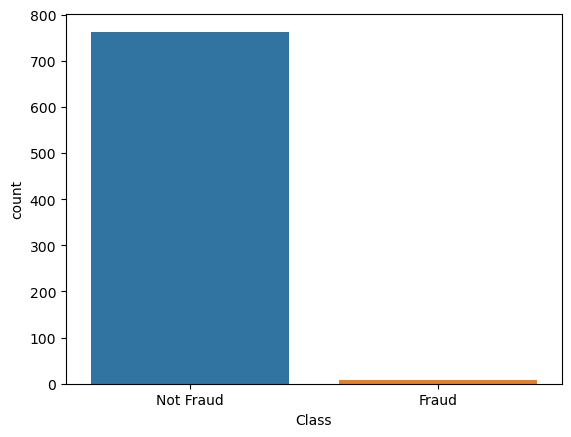

In [12]:
# plot the no of 1's and 0's
g = sns.countplot(data['Class'])
g.set_xticklabels(['Not Fraud', 'Fraud'])
plt.show()

In [13]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

# check length of 1's and 0's
one = np.where(y==1)
zero = np.where(y==0)
len(one[0]), len(zero[0])

(9, 763)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
# import library
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)

# fit predictor and target varialbe
x_rus, y_rus = rus.fit_resample(x, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0: 763, 1: 9})
Resample dataset shape Counter({0: 9, 1: 9})


In [16]:
# import library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target varaible
x_ros, y_ros = ros.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 763, 1: 9})
Resample dataset shape Counter({1: 763, 0: 763})


In [17]:
from xgboost import XGBClassifier
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_ros, y_ros, test_size =0.20, random_state=42)

m = XGBClassifier()
m.fit(x_train1, y_train1)
predict_y = m.predict(x_test1)

print('ROCAUC score:',roc_auc_score(y_test1, predict_y))
print('Accuracy score:',accuracy_score(y_test1, predict_y))
print('F1 score:',f1_score(y_test1, predict_y))

ROCAUC score: 0.9930555555555556
Accuracy score: 0.9934640522875817
F1 score: 0.9938650306748467


In [14]:
!pip install xgboost

^C


# 1.ROS

In [25]:

x = data.iloc[:, :-1]
y = data.iloc[:, -1]

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_ros, y_ros, test_size =0.20, random_state=42)


In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC

decisiontree = DecisionTreeClassifier()
logisticregression = LogisticRegression()
knearestclassifier = KNeighborsClassifier()
svm_classifier = SVC()
bernoulli_naiveBayes = BernoulliNB()
passiveAggressive = PassiveAggressiveClassifier()

knearestclassifier.fit(x_train1, y_train1)
decisiontree.fit(x_train1, y_train1)
logisticregression.fit(x_train1, y_train1)
passiveAggressive.fit(x_train1, y_train1)
svm_classifier.fit(x_train1, y_train1)

data1 = {"Classification Algorithms": ["KNN Classifier", "Decision Tree Classifier", 
                                       "Logistic Regression", "Passive Aggressive Classifier","SVM"],
      "Score": [knearestclassifier.score(x,y), decisiontree.score(x, y), 
                logisticregression.score(x, y), passiveAggressive.score(x,y),svm_classifier.score(x,y) ]}
score = pd.DataFrame(data1)
score

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this 

,Classification Algorithms,Score
0,KNN Classifier,0.988342
1,Decision Tree Classifier,0.990933
2,Logistic Regression,0.989637
3,Passive Aggressive Classifier,0.989637
4,SVM,0.988342


# 2.K fold


In [79]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=True,shuffle=True)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f" % (name, cv_results.mean())
    print(msg)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

LR: 0.987080


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

KNN: 0.988362
CART: 0.975391
NB: 0.959824
SVM: 0.988362


# 3. Random sampling

In [47]:
#3. Random sampling
df_sample_random = data.sample(n = 100, replace = False, random_state = None)
display(df_sample_random)
display(df_sample_random.shape)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
567,425,-0.367058,1.035851,1.108064,-0.065459,0.366306,-0.322658,0.596340,0.109672,-0.318671,...,-0.262881,-0.671307,-0.022587,-0.347485,-0.197110,0.125083,0.258796,0.090689,3.59,0
703,530,1.445729,-0.992653,0.702959,-1.311315,-1.613625,-0.726591,-1.045431,-0.079224,-1.812438,...,-0.409740,-0.819422,0.287770,0.322668,-0.007635,-0.469269,0.050763,0.027198,12.00,0
582,434,-0.679293,1.120837,1.319394,1.249827,1.147786,-0.086534,1.001436,-0.039752,-1.374497,...,0.067521,0.030112,-0.296954,-0.619850,0.282799,-0.059404,0.048695,0.109200,25.03,0
515,380,1.158923,0.165064,0.507316,0.456052,-0.193600,-0.180777,-0.070487,0.046688,-0.302918,...,-0.166915,-0.476946,0.139460,0.028225,0.130464,0.104225,-0.014329,0.008026,9.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,297,1.168460,0.284169,0.427985,1.382027,-0.057586,-0.157170,0.132989,-0.070709,0.141838,...,-0.091412,0.025132,-0.072434,0.121771,0.697131,-0.315949,0.046610,0.017891,6.86,0
532,399,1.091666,0.068682,1.230334,2.554474,-0.454169,0.915781,-0.701016,0.396866,0.307571,...,-0.098440,-0.178428,0.007277,-0.504025,0.255974,0.022213,0.048714,0.027057,15.19,0
336,246,-1.069200,1.239963,0.545157,1.005354,-0.025696,-0.910673,0.422442,0.049283,-0.564601,...,0.146555,0.602990,0.132656,0.427113,-0.084030,-0.417194,-0.897885,-0.462042,2.98,0
328,241,-1.142321,0.626405,2.526917,2.827973,0.619263,0.897473,0.536278,-0.060163,-0.813749,...,-0.309746,-0.269173,0.177396,-0.019578,0.048651,0.068831,-0.246503,-0.230837,10.62,0


(100, 31)

In [48]:
x1 = df_sample_random .iloc[:, :-1]
y1 = df_sample_random .iloc[:, -1]

x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size =0.20, random_state=42)

In [49]:

decisiontree = DecisionTreeClassifier()
logisticregression = LogisticRegression()
knearestclassifier = KNeighborsClassifier()
svm_classifier = SVC()
bernoulli_naiveBayes = BernoulliNB()
passiveAggressive = PassiveAggressiveClassifier()

knearestclassifier.fit(x_train1, y_train1)
decisiontree.fit(x_train1, y_train1)
logisticregression.fit(x_train1, y_train1)
passiveAggressive.fit(x_train1, y_train1)
svm_classifier.fit(x_train1, y_train1)

data1 = {"Classification Algorithms": ["KNN Classifier", "Decision Tree Classifier", 
                                       "Logistic Regression", "Passive Aggressive Classifier","SVM"],
      "Score": [knearestclassifier.score(x,y), decisiontree.score(x, y), 
                logisticregression.score(x, y), passiveAggressive.score(x,y),svm_classifier.score(x,y) ]}
score = pd.DataFrame(data1)
score

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this 

,Classification Algorithms,Score
0,KNN Classifier,0.988342
1,Decision Tree Classifier,0.963731
2,Logistic Regression,0.965026
3,Passive Aggressive Classifier,0.612694
4,SVM,0.988342


# 4. Systematic Sampling

In [66]:
# Define systematic sampling function
def systematic_sampling(df, step):
 
    indexes = np.arange(0, len(df), step=step)
    systematic_sample = df.iloc[indexes]
    return systematic_sample
 
#Obtain a systematic sample and save it in a new variable
systematic_sample = systematic_sampling(data, 3)
 
# View sampled data frame
display(systematic_sample)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
699,529,-2.000567,-2.495484,2.467149,1.140053,2.462010,0.594262,-2.110183,0.788347,0.958809,...,0.422452,1.195394,0.297836,-0.857105,-0.219322,0.861019,-0.124622,-0.171060,1.50,1
514,380,-1.299837,0.881817,1.452842,-1.293698,-0.025105,-1.170103,0.861610,-0.193934,0.592001,...,-0.272563,-0.360853,0.223911,0.598930,-0.397705,0.637141,0.234872,0.021379,0.00,0
172,110,-0.591933,0.111273,0.699126,-1.536074,1.193208,0.648896,0.796706,0.016904,0.789664,...,0.205964,1.216195,0.093396,-0.900310,-0.423966,-0.607857,0.017705,-0.076746,13.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,403,0.699599,-2.631727,0.661576,-0.707254,-2.261000,0.360969,-1.069656,-0.053544,-0.833647,...,0.049882,0.068132,-0.499373,-0.028743,0.460852,-0.003403,0.020449,0.092994,411.88,0
211,140,-3.222745,-1.932776,2.923242,0.143574,0.948117,-1.076456,0.811226,-1.170683,1.363753,...,-0.657897,0.983985,1.304693,0.804414,0.686028,0.455321,-0.373342,-1.325164,11.00,0
284,204,-0.938226,0.104717,1.309642,-0.867537,0.450685,-1.437502,0.650604,0.028360,-0.588678,...,-0.237086,-1.150829,0.262462,0.475206,-0.516790,0.426883,-0.058198,0.107996,39.94,0
767,575,-0.572263,0.731748,1.541254,0.150506,1.108974,0.372152,1.084879,-0.146329,-0.274447,...,-0.143508,-0.107582,-0.418263,-0.731029,0.877525,-0.364150,-0.177509,-0.256545,26.72,0


In [80]:
x1 = systematic_sample .iloc[:, :-1]
y1 = systematic_sample.iloc[:, -1]

x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size =0.20, random_state=42)

In [81]:
decisiontree = DecisionTreeClassifier()
logisticregression = LogisticRegression()
knearestclassifier = KNeighborsClassifier()
svm_classifier = SVC()
bernoulli_naiveBayes = BernoulliNB()
passiveAggressive = PassiveAggressiveClassifier()

knearestclassifier.fit(x_train1, y_train1)
decisiontree.fit(x_train1, y_train1)
logisticregression.fit(x_train1, y_train1)
passiveAggressive.fit(x_train1, y_train1)
svm_classifier.fit(x_train1, y_train1)

data1 = {"Classification Algorithms": ["KNN Classifier", "Decision Tree Classifier", 
                                       "Logistic Regression", "Passive Aggressive Classifier","SVM"],
      "Score": [knearestclassifier.score(x,y), decisiontree.score(x, y), 
                logisticregression.score(x, y), passiveAggressive.score(x,y),svm_classifier.score(x,y) ]}
score = pd.DataFrame(data1)
score

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this 

,Classification Algorithms,Score
0,KNN Classifier,0.988342
1,Decision Tree Classifier,0.988342
2,Logistic Regression,0.989637
3,Passive Aggressive Classifier,0.988342
4,SVM,0.988342


# 5. Cluster Sampling

In [87]:
samples = data.sample(500).sort_values(by='Time')
 
# show samples
print(samples)

     Time        V1        V2        V3        V4        V5        V6  \
1       0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
3       1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
5       2 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728   
4       2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
6       4  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708   
..    ...       ...       ...       ...       ...       ...       ...   
764   574 -1.062129 -0.618574  0.615388 -3.335834  0.746649 -0.540531   
766   574  1.257719  0.364739  0.306923  0.690638 -0.357792 -1.067481   
763   574 -0.402057  0.584300  2.474227  0.929684  0.014314  0.297490   
769   579  1.214170  0.210481  0.484651  0.479768 -0.261955 -0.527039   
770   580  1.267030 -0.071114  0.037680  0.512683  0.242392  0.705212   

           V7        V8        V9  ...       V21       V22       V23  \
1   -0.078803  0.085102 -0.255425  ... -0.225775 -0

In [88]:
x1 = samples.iloc[:, :-1]
y1 = samples .iloc[:, -1]

x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size =0.20, random_state=42)

In [95]:
decisiontree = DecisionTreeClassifier()
logisticregression = LogisticRegression()
knearestclassifier = KNeighborsClassifier()
svm_classifier = SVC()
bernoulli_naiveBayes = BernoulliNB()
passiveAggressive = PassiveAggressiveClassifier()

knearestclassifier.fit(x_train1, y_train1)
decisiontree.fit(x_train1, y_train1)
logisticregression.fit(x_train1, y_train1)
passiveAggressive.fit(x_train1, y_train1)
svm_classifier.fit(x_train1, y_train1)

data1 = {"Classification Algorithms": ["KNN Classifier", "Decision Tree Classifier","Logistic Regression"
                                       , "Passive Aggressive Classifier","SVM"],
      "Score": [knearestclassifier.score(x,y), decisiontree.score(x, y), 
                logisticregression.score(x, y), passiveAggressive.score(x,y),svm_classifier.score(x,y) ]}
score = pd.DataFrame(data1)
score

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this 

,Classification Algorithms,Score
0,KNN Classifier,0.988342
1,Decision Tree Classifier,0.981865
2,Logistic Regression,0.987047
3,Passive Aggressive Classifier,0.988342
4,SVM,0.988342
